# Linear Regression

#### y = b1 * x + b0     or    y = m * x + b      In this formula, m is the slope and b is y-intercept.

As the predicted value of y depends on the slope and constant, hence our 
goal is to find the values for slope and constant that minimize the loss function or 
in other words, minimize the difference between y predicted and true values.

Gradient descent is by far the most popular optimization algorithm used in machine learning.
Using gradient descent we iteratively calculate the gradients of the loss function with
respect to the parameters and keep on updating the parameters till we reach the local minima.

### Step-1 Initializing the parameters
Here, we need to initialize the values for our parameters. Let’s keep slope = 0 and constant = 0.
We will also need a learning rate to determine the step size at each iteration while moving toward 
a minimum value of our loss function.

### Step -2 Calculate the Partial Derivatives with respect to parameters
Here we partially differentiate our loss function with respect to the parameters we have.

### Step – 3 Updating the parameters
Now, we update the values of our parameters using the equations given below:
Updating Parameters
Updating Parameters
The updated values for our parameters will be the values with which, each step
minimizes our loss function and reduces the difference between the true and predicted values.
Repeat the process to reach a point of local minima.


In [57]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
df = pd.read_csv('placement.csv')

In [58]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


# 1 Gradient Decent

In [144]:
#Import required modules
import numpy as np
 
#Defining the class
class LinearRegression:
    def __init__(self, x , y):
        self.data = x
        self.label = y
        self.m = 0
        self.b = 0
        self.n = len(x)
         
    def fit(self , epochs , lr):
         
        #Implementing Gradient Descent
        for i in range(epochs):
            y_pred = self.m * self.data + self.b
             
            #Calculating derivatives w.r.t Parameters
            D_m = (-2/self.n)*sum(self.data * (self.label - y_pred))
            D_b = (-2/self.n)*sum(self.label-y_pred)
             
            #Updating Parameters
            self.m = self.m - lr * D_m
            self.b = self.b - lr * D_b
             
    def predict(self , inp):
        y_pred = self.m * inp + self.b 
        return y_pred

R2 score 0.4472685237138645


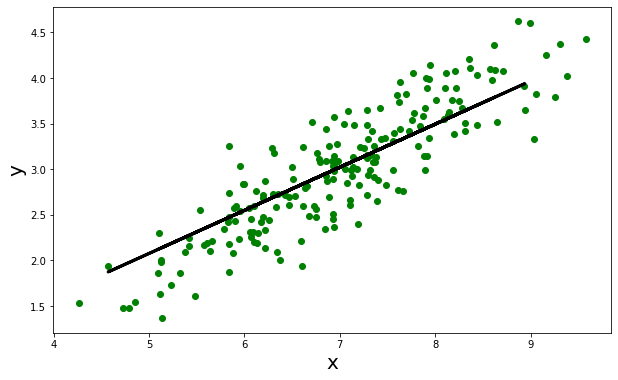

In [163]:
#importing Matplotlib for plotting
import matplotlib.pyplot as plt
 
# Preparing the data
x1 = np.array(df.iloc[:,0])
y1 = np.array(df.iloc[:,1])

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=2)

#Creating the class object
regressor = LinearRegression(X_train,y_train)
 
#Training the model with .fit method
regressor.fit(1000 , 0.01) # epochs-1000 , learning_rate - 0.0001
 
#Prediciting the values
y_pred = regressor.predict(X_test)
r2 = r2_score(y_pred, y_test)
print("R2 score",r2)
#Plotting the results
plt.figure(figsize = (10,6))
plt.scatter(x1,y1 , color = 'green')
plt.plot(X_test , y_pred , color = 'k' , lw = 3)
plt.xlabel('x' , size = 20)
plt.ylabel('y', size = 20)
plt.show()

In [154]:
# ------------------------------------------------------------

# 2) Least squares Method

In [18]:
class LR:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
        
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)       
    
    def predict(self,X_test):
        
        print(X_test)
        
        return self.m * X_test + self.b

In [19]:
X = np.array(df.iloc[:,0])
y = np.array(df.iloc[:,1])

In [20]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [21]:
lr = LR()

In [22]:
lr.fit(X_train,y_train)

0.5579519734250721
-0.8961119222429152


In [23]:
y_pred1 = lr.predict(X_test)

[8.58 7.15 5.88 6.22 4.57 4.79 5.32 6.86 8.35 6.87 8.94 7.9  6.93 5.91
 7.32 7.82 5.09 7.42 6.94 7.73 6.19 7.28 6.73 7.2  8.21 6.75 7.87 7.6
 8.63 5.12 8.15 7.36 8.31 6.6  6.59 7.47 7.93 6.29 6.37 6.47]


In [24]:
r2 = r2_score(y_pred1, y_test)
r2

0.6626575570753075

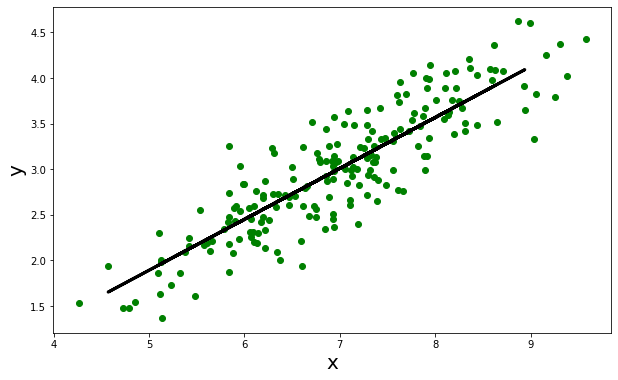

In [25]:
plt.figure(figsize = (10,6))
plt.scatter(X,y , color = 'green')
plt.plot(X_test , y_pred1 , color = 'k' , lw = 3)
plt.xlabel('x' , size = 20)
plt.ylabel('y', size = 20)
plt.show()

# 3) Least squares Method

The R2 score of the model is:  0.7113765562535596
The MSE score of the model is:  0.10781915059742189


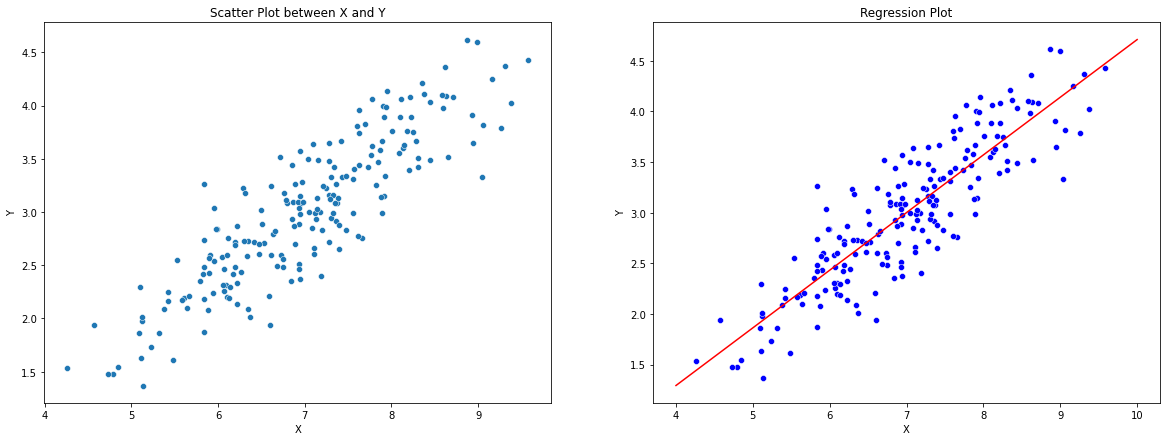

In [30]:
# Import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error


dff = pd.read_csv('placement.csv')
x = np.array(dff.iloc[:,0])
y = np.array(dff.iloc[:,1])

# mean
def get_mean(arr):
    return np.sum(arr)/len(arr)

# variance
def get_variance(arr, mean):
    return np.sum((arr-mean)**2)

# covariance
def get_covariance(arr_x, mean_x, arr_y, mean_y):
    final_arr = (arr_x - mean_x)*(arr_y - mean_y)
    return np.sum(final_arr)

# find coeff
def get_coefficients(x, y):
    x_mean = get_mean(x)
    y_mean = get_mean(y)
    m = get_covariance(x, x_mean, y, y_mean)/get_variance(x, x_mean)
    c = y_mean - x_mean*m
    return m, c

# Regression Function
def linear_regression(x_train, y_train, x_test, y_test):
    prediction = []
    m, c = get_coefficients(x_train, y_train)
    for x in x_test:
        y = m*x + c
        prediction.append(y)
    
    r2 = r2_score(prediction, y_test)
    mse = mean_squared_error(prediction, y_test)
    print("The R2 score of the model is: ", r2)
    print("The MSE score of the model is: ", mse)
    return prediction

# There are 100 sample out of which 80 are for training and 20 are for testing
linear_regression(X[:80], y[:80], X[80:], y[80:])

# Visualize
def plot_reg_line(x, y):
    prediction = []
    m, c = get_coefficients(x, y)
    for x0 in range(4,11):
        yhat = m*x0 + c
        prediction.append(yhat)
    
    fig = plt.figure(figsize=(20,7))
    plt.subplot(1,2,1)
    sns.scatterplot(x=x, y=y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot between X and Y')
    
    plt.subplot(1,2,2)
    sns.scatterplot(x=x, y=y, color = 'blue')
    sns.lineplot(x = [i for i in range(4, 11)], y = prediction, color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Regression Plot')
    plt.show()
    
plot_reg_line(X, y)

# With Sklearn

The R2 score of the model is:  0.7113765562535596
The MSE score of the model is:  0.10781915059742189


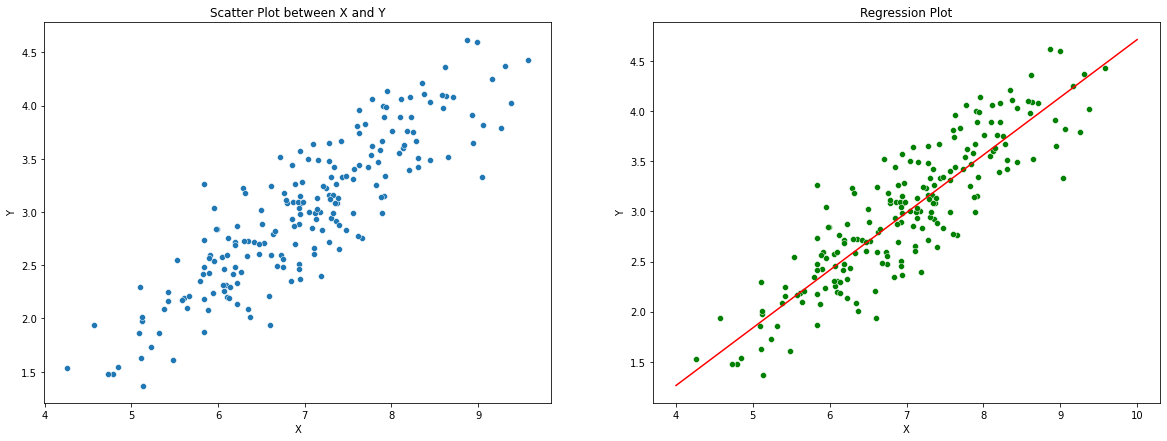

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

dff = pd.read_csv('placement.csv')
x = df['cgpa'].values
y = df['package'].values

reg = LinearRegression()
reg.fit(x[:80].reshape(-1, 1), y[:80])
prediction = reg.predict(x[80:].reshape(-1, 1))
r2 = r2_score(prediction, y[80:])
mse = mean_squared_error(prediction, y[80:])
print("The R2 score of the model is: ", r2)
print("The MSE score of the model is: ", mse)

prediction = reg.predict(np.array([i for i in range(4, 11)]).reshape(-1, 1))

fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.scatterplot(x=x, y=y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot between X and Y')

plt.subplot(1,2,2)
sns.scatterplot(x=x, y=y, color = 'green')
sns.lineplot(x = [i for i in range(4, 11)], y = prediction, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Plot')
plt.show()
